In [83]:
%matplotlib notebook

from modsim import *

In [84]:
kg = UNITS.kilogram
m = UNITS.meter
s = UNITS.second
N = UNITS.newton
degree = UNITS.degree

In [85]:
#mass of person
mass = 62.1422 * kg

In [86]:
#constants
g = 9.81 * m/s**2
k_trampoline = 200 * kg/s**2

In [87]:
#starting conditions
init = State(y = 0 * m,
             v = 3 * m/s)

In [88]:
duration = .30581039755351*2
ts = linrange (0, duration, .01)

In [89]:
system = System(init=init, g=g, ts=ts)

In [90]:
def slope_func(state, t, system):
    y, v = state
    unpack(system)
    
    dydt = v
    dvdt = -g
    
    return dydt, dvdt

In [91]:
slope_func(init, 0 , system)

(<Quantity(3.0, 'meter / second')>, <Quantity(-9.81, 'meter / second ** 2')>)

In [92]:
run_odeint(system, slope_func)

In [93]:
def plot_position(results):
    newfig()
    plot(results.y, label = 'y')
    
    decorate(xlabel = 'Time (s)',
             ylabel = 'Position (m)')

<IPython.core.display.Javascript object>


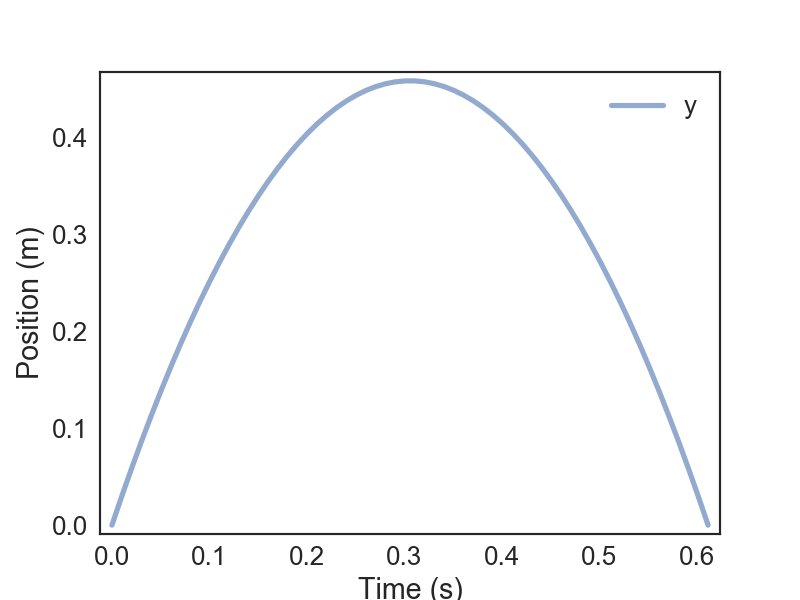

In [94]:
plot_position(system)

In [95]:
d = 0.45859872611464 * m

In [96]:
v_final_down = sqrt(2*g*d) #vertical velocity right before contact with trampoline
t = sqrt(2*d/g) #time to reach trampoline
p = mass * v_final_down #momentum at bottom
force_down = p/t #force applied to trampoline
tramp_displace = force_down / k_trampoline #trampoline displacement
tramp_PE = 0.5 * k_trampoline * tramp_displace**2 #elastic potential energy of trampoline

tramp_PE

<Quantity(929.0760656971511, 'kilogram * meter ** 2 / second ** 2')>

In [114]:
k = 2 * kg/s**2

In [115]:
#legs
x = .2 * m
leg_PE = 1/2 * k * x**2

In [116]:
Total_PE = tramp_PE + leg_PE

In [117]:
v_up = sqrt(2 * Total_PE / mass)

In [118]:
init_up = State(y = 0 *m,
                v = v_up)

In [119]:
duration_up = v_up/g/s + duration

In [120]:
ts_up = linrange(duration, duration_up, .01)

In [121]:
system_up = System(init=init_up, g=g, ts=ts)

In [122]:
slope_func(init_up, 0, system_up)

(<Quantity(5.468354618807692, 'meter / second')>,
 <Quantity(-9.81, 'meter / second ** 2')>)

In [123]:
run_odeint(system_up, slope_func)

<IPython.core.display.Javascript object>


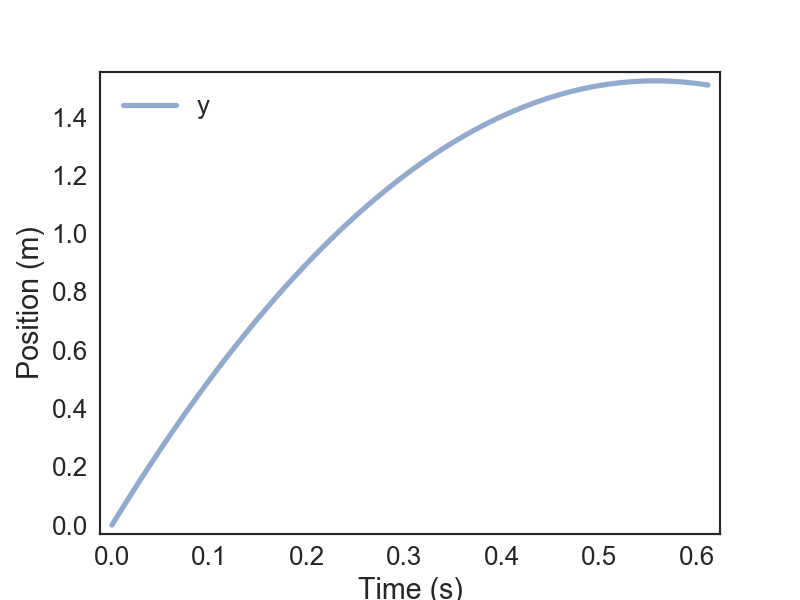

In [124]:
plot_position(system_up.results)

In [ ]:
k_values = linspace(0 * kg/s**2, 2 * kg/s**2, 21)
sweep = SweepSeries()

for k in k_values:
    x = .2 * m
    leg_PE = 1/2 * k * x**2
    print(k, leg_PE)
    sweep[k] = leg_PE